In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Test DFT and IDFT

We take a simple signal $f$ and we apply a Discrete Fourier Transform (**DFT**) to retrieve its frequencies. We then use the Inverse Discrete Fourier Transform (**IDFT**) to recompose the signal from its frequencies.

## The signal

In [2]:
def rect(t):
    if np.abs(t) > 1/2:
        return 0
    elif np.abs(t) == 1/2:
        return 1/2
    else:
        return 1

In [3]:
# Arguments
dt = .01 # sample spacing (distance between two adjacent samples)

N = 251 # sample size (N/2 is the number the positive frequencies)

T = np.linspace(-N*dt/2, N*dt/2, N) # The time sample
x = np.array( [rect(t) for t in T] ) # The signal sample

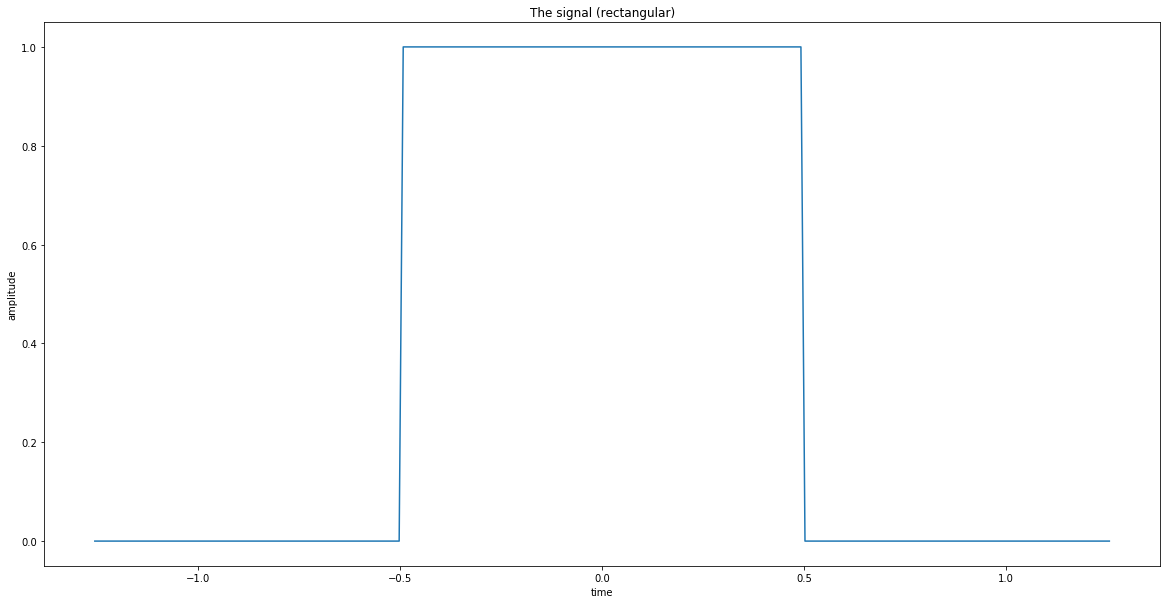

In [4]:
plt.figure(figsize = (20, 10))
plt.title("The signal (rectangular)")
plt.xlabel("time")
plt.ylabel("amplitude")
plt.plot(T, x)

## DFT

https://en.wikipedia.org/wiki/Rectangular_function#Fourier_transform_of_the_rectangular_function

We use the DFT to get the amplitudes associated to the frequencies.

**Remark**:
a normalization is necessary before getting the true amplitudes.

In [5]:
X = np.fft.fft(x) # The amplitudes
print(X)
X_half = np.fft.fftshift(X) # The amplitudes of the positive frequencies
Xi = np.fft.fftshift( np.fft.fftfreq(N, dt) ) # The frequencies sample (only positive ones)

[ 9.90000000e+01+0.j         -7.55371918e+01-0.94549593j
  2.45936166e+01+0.61577106j  1.44933122e+01+0.54446407j
 -1.93657806e+01-0.97036298j  1.39638375e+00+0.08750209j
  1.21396045e+01+0.91337568j -7.76823712e+00-0.68235426j
 -4.66803014e+00-0.46898032j  8.73176030e+00+0.98778605j
 -1.38556555e+00-0.17433292j -6.30971605e+00-0.87424863j
  4.91427061e+00+0.7437029j   2.37506745e+00+0.38989887j
 -5.63493408e+00-0.99763148j  1.36763682e+00+0.25982639j
  4.08123048e+00+0.82841492j -3.69986342e+00-0.79934635j
 -1.34313926e+00-0.30782638j  4.12474366e+00+0.99982377j
 -1.34274925e+00-0.34332664j -2.88487617e+00-0.77622618j
  3.00442410e+00+0.84885776j  7.54449235e-01+0.22339245j
 -3.21000056e+00-0.99434607j  1.31111371e+00+0.42419313j
  2.12815769e+00+0.71808275j -2.53785948e+00-0.8918573j
 -3.75451567e-01-0.13724481j  2.58356656e+00+0.98124042j
 -1.27299880e+00-0.50180548j -1.60115044e+00-0.65443066j
  2.19177303e+00+0.9280151j   1.14191764e-01+0.05004431j
 -2.11937051e+00-0.96060735j  1.

**CHECK THE PLOT**

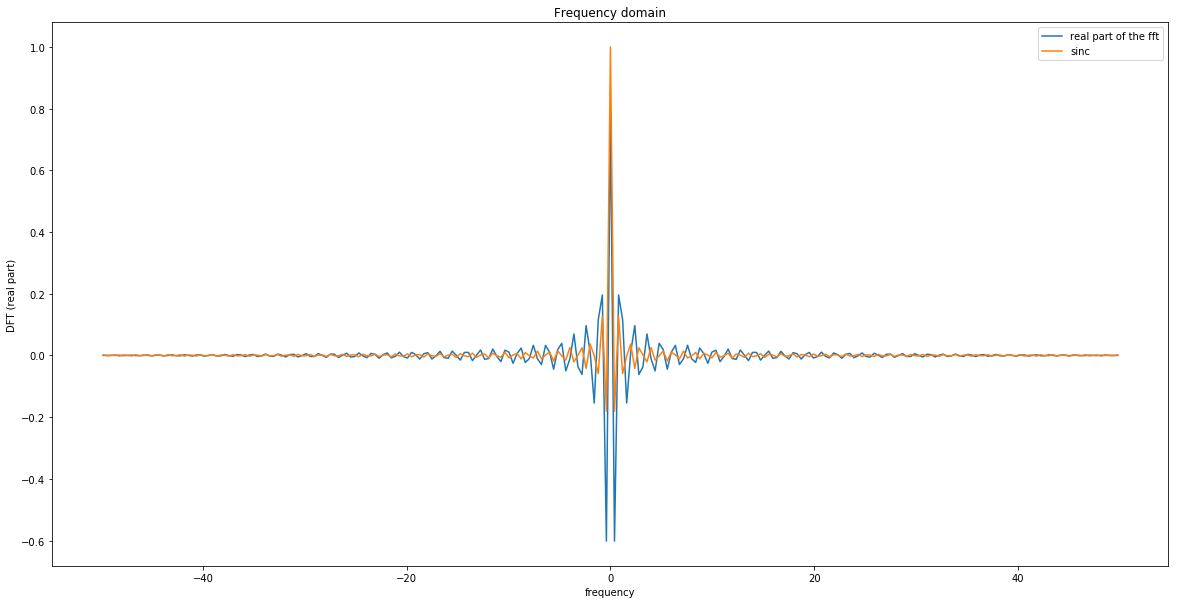

In [21]:
plt.figure(figsize = (20, 10))
plt.title("Frequency domain")
plt.xlabel("frequency")
plt.ylabel("DFT (real part)")
plt.plot(Xi, X_half.real/(0.5*N), label = "real part of the fft")
plt.plot(Xi, np.sinc(np.pi*Xi), label = "sinc" )
plt.legend()
plt.show()

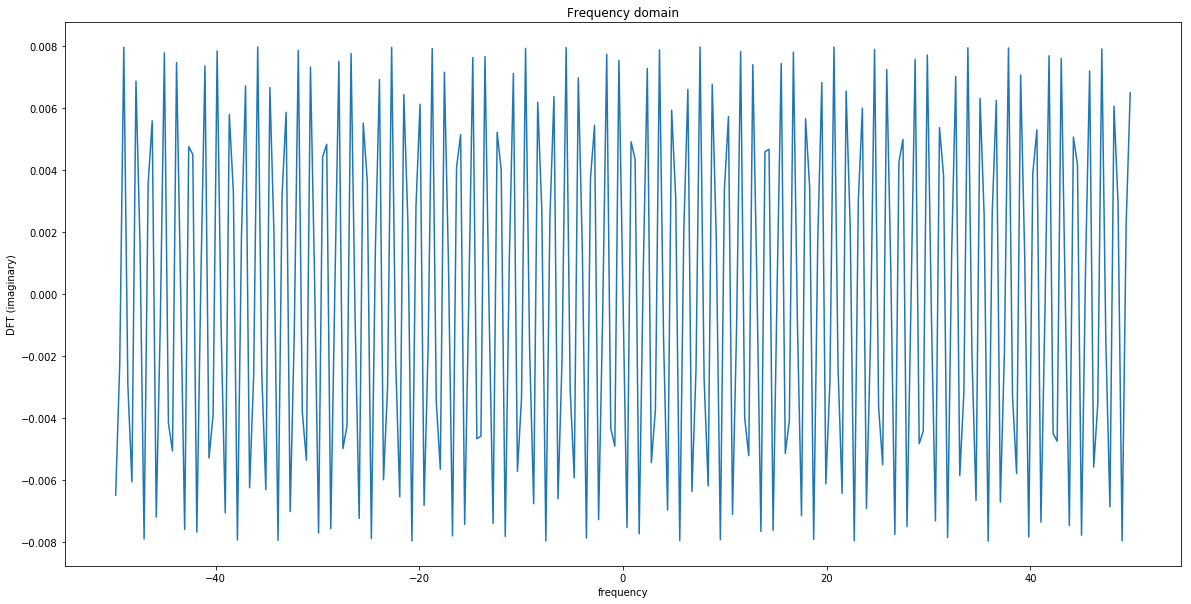

In [23]:
plt.figure(figsize = (20, 10))
plt.title("Frequency domain")
plt.xlabel("frequency")
plt.ylabel("DFT (imaginary)")
plt.plot(Xi, X_half.imag/(.5*N))
#plt.plot(Xi, np.sinc(np.pi*Xi) )

In [7]:
np.sinc(2.3)

0.11196439452184424

<StemContainer object of 3 artists>

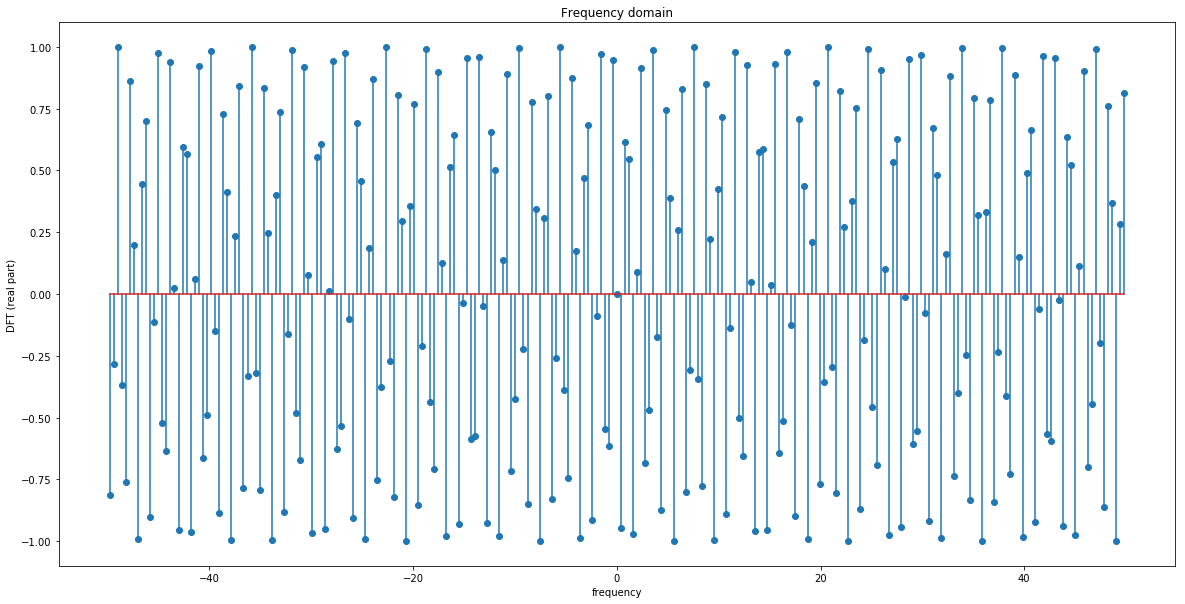

In [8]:
plt.figure(figsize = (20, 10))
plt.title("Frequency domain")
plt.xlabel("frequency")
plt.ylabel("DFT (real part)")
plt.stem(Xi, X_half.imag)

<StemContainer object of 3 artists>

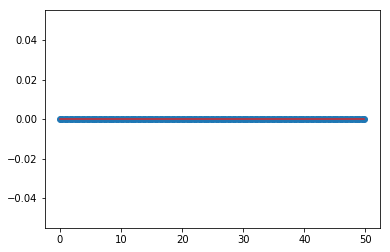

In [9]:
# a_n components of the Fourier series?
A = []
for i in np.arange(0, N//2 + 1):
    A.append( np.real( X[i] - X[-i] ) )
A = np.array(A)
plt.stem(Xi[N//2:], A)

<StemContainer object of 3 artists>

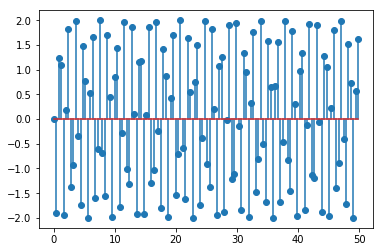

In [10]:
# b_n components of the Fourier series?
B = []
for i in np.arange(0, N//2 + 1):
    B.append( np.imag( X[i] - X[-i] ) )
B = np.array(B)
plt.stem(Xi[N//2:], B)

## IDFT

From the amplitudes/values of the DFT we can recover the signal using the IDFT.

In [11]:
recovered_x = np.fft.ifft(X) # IDFT
error = np.abs(recovered_x.real - x) # we also compute the error between the original signal and the one returned by the IDFT

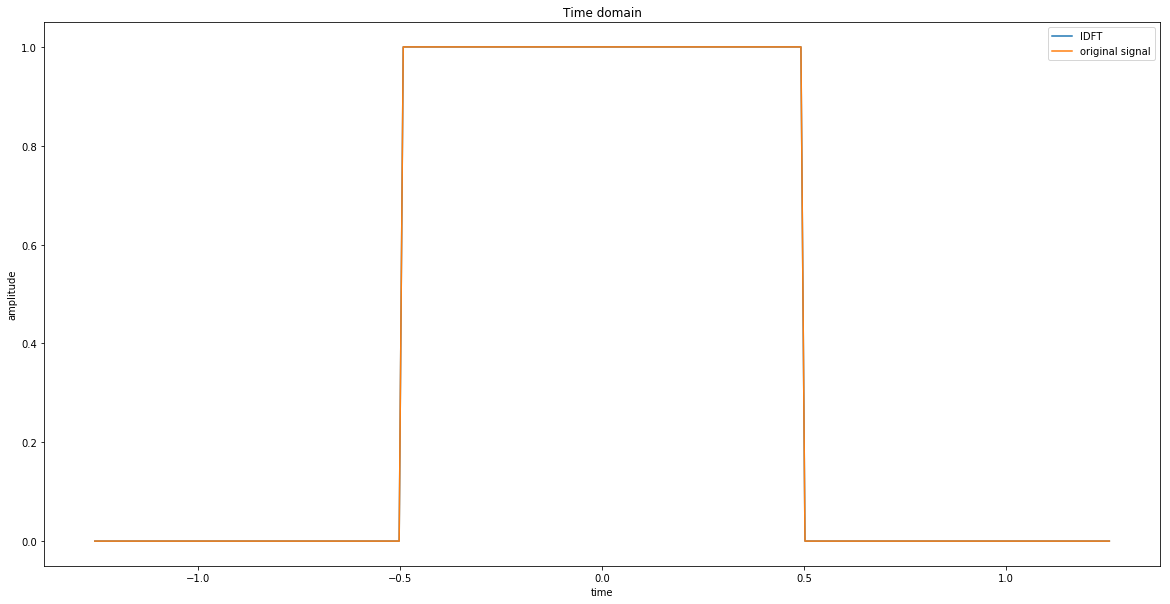

In [12]:
plt.figure( figsize = (20, 10) )
plt.plot(T, recovered_x.real, label = "IDFT")
plt.plot(T, x, label = "original signal")
plt.title("Time domain")
plt.xlabel("time")
plt.ylabel("amplitude")
plt.legend()

Maximum value of the error :  8.881784197001252e-16


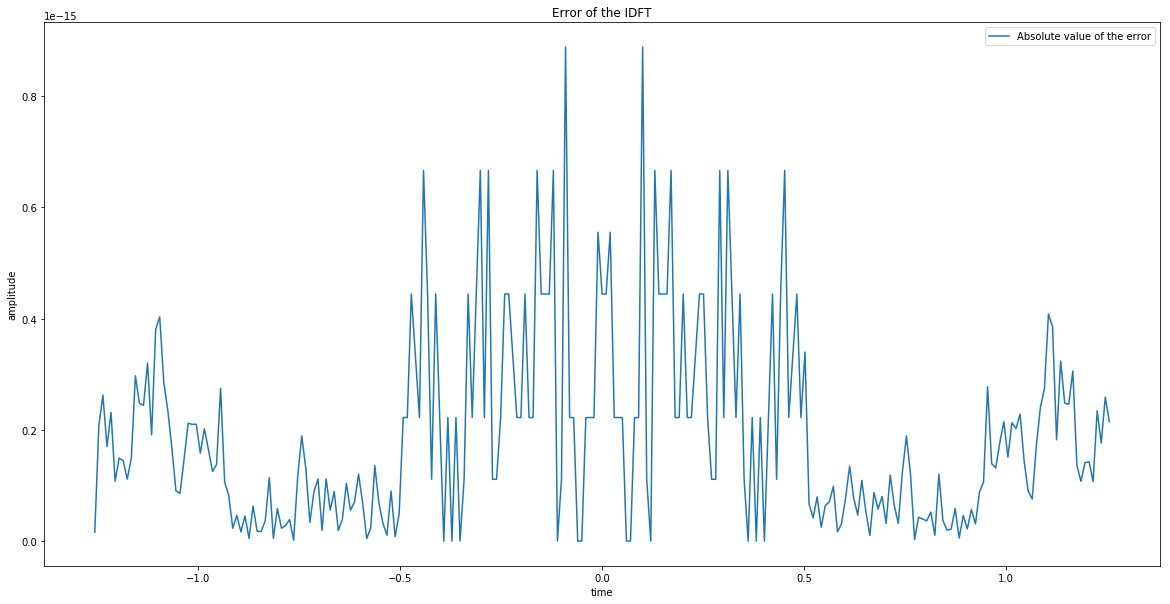

In [13]:
plt.figure( figsize = (20, 10) )
plt.plot(T, error, label = "Absolute value of the error")
plt.title("Error of the IDFT")
plt.xlabel("time")
plt.ylabel("amplitude")
plt.legend()
print("Maximum value of the error : ", np.amax(error))